In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import neighbors
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv ('voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [3]:
le = preprocessing.LabelEncoder()
df["label"] = le.fit_transform(df["label"])

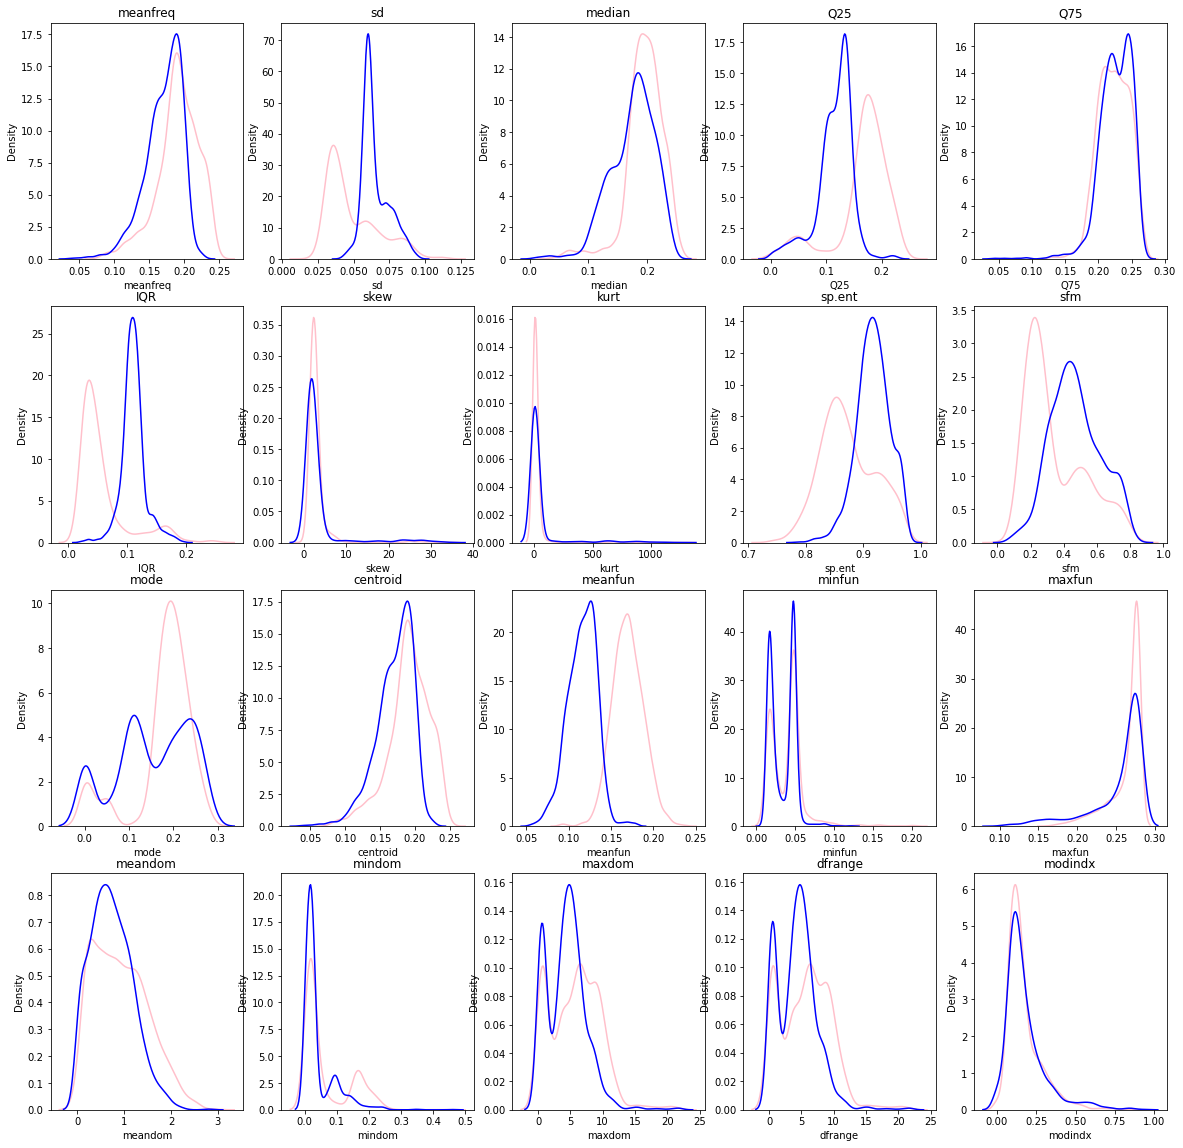

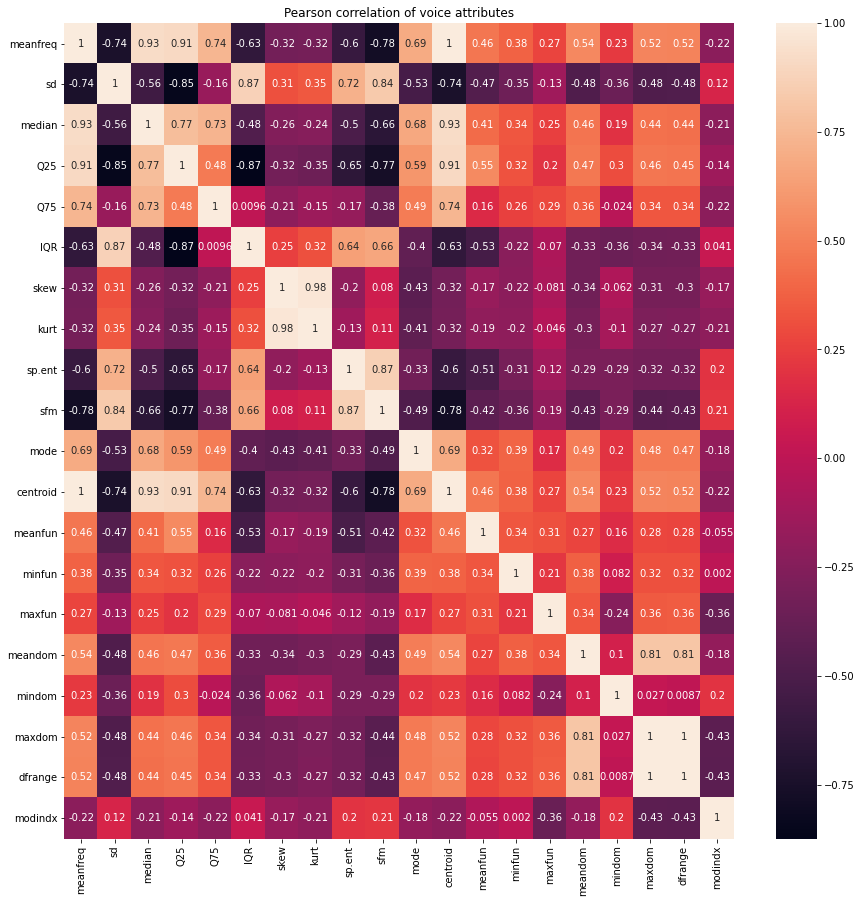

In [23]:
plt.subplots(4,5,figsize=(20,20))
for i in range(1,21):
    plt.subplot(4,5,i)
    plt.title(df.columns[i-1])
    sns.kdeplot(df.loc[df['label'] == 0, df.columns[i-1]], color= 'pink')
    sns.kdeplot(df.loc[df['label'] == 1, df.columns[i-1]], color= 'blue')
    
plt.figure(figsize=(15,15))
plt.title('Pearson correlation of voice attributes')
sns.heatmap(df.iloc[:,:-1].corr(),annot = True)
plt.show()

In [5]:
scaler = StandardScaler()
X = df.iloc[:, :-1]
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
knn_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_grid, cv = 4)

knn_results = knn_cv.fit(X_train, y_train)

predictions_cv_knn = knn_cv.predict(X_test)
print('Classification report: \n',classification_report(y_test,predictions_cv_knn))
print('Confusion matrix (TN, FP, FN, TP): \n', confusion_matrix(y_test, predictions_cv_knn))
print()
print('The error rate was minimal at K = '+str(knn_results.best_params_) + ' with score: '+str(knn_results.best_score_))

Classification report: 
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       479
           1       0.97      0.96      0.97       472

    accuracy                           0.97       951
   macro avg       0.97      0.97      0.97       951
weighted avg       0.97      0.97      0.97       951

Confusion matrix (TN, FP, FN, TP): 
 [[467  12]
 [ 18 454]]

The error rate was minimal at K = {'n_neighbors': 6} with score: 0.975189449377175


In [8]:
log_grid={'C' : np.logspace(-4, 4, 50), 'penalty' : ['l1', 'l2']}

log = LogisticRegression()

log_cv = GridSearchCV(log,log_grid,cv = 4)
log_results = log_cv.fit(X_train,y_train)

predictions_cv_log = knn_cv.predict(X_test)
print('Classification report: \n',classification_report(y_test,predictions_cv_log))
print('Confusion matrix (TN, FP, FN, TP): \n',confusion_matrix(y_test, predictions_cv_log))
print()

print('The error rate was minimal at K = '+ str(log_results.best_params_) + ' with score: '+ str(log_results.best_score_))


C:\Users\Arthur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Arthur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Arthur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Arthur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Arthur\anaconda3\lib\site-packages\sklearn\model_selecti

C:\Users\Arthur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Arthur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Arthur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Arthur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Arthur\anaconda3\lib\site-packages\sklearn\model_selecti

C:\Users\Arthur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Arthur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Arthur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Arthur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Arthur\anaconda3\lib\site-packages\sklearn\model_selecti

C:\Users\Arthur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Arthur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Arthur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Arthur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Arthur\anaconda3\lib\site-packages\sklearn\model_selecti

C:\Users\Arthur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Arthur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Arthur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Arthur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Arthur\anaconda3\lib\site-packages\sklearn\model_selecti

C:\Users\Arthur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Arthur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Arthur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Arthur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Arthur\anaconda3\lib\site-packages\sklearn\model_selecti

Classification report: 
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       479
           1       0.97      0.96      0.97       472

    accuracy                           0.97       951
   macro avg       0.97      0.97      0.97       951
weighted avg       0.97      0.97      0.97       951

Confusion matrix (TN, FP, FN, TP): 
 [[467  12]
 [ 18 454]]

The error rate was minimal at K = {'C': 0.3906939937054613, 'penalty': 'l2'} with score: 0.9760936026278986


In [9]:
rf_grid = {'max_depth':np.arange(1,20)}

rf = RandomForestClassifier()

rf_CV = GridSearchCV(rf, rf_grid, cv = 4)
rf_results = rf_CV.fit(X_train, y_train)

predictions_cv_fr = knn_cv.predict(X_test)
print('Classification report: \n',classification_report(y_test,predictions_cv_fr))
print('Confusion matrix (TN, FP, FN, TP): \n',confusion_matrix(y_test, predictions_cv_fr))
print()
print('The error rate was minimal at K = '+str(rf_results.best_params_) + ' with score: '+str(rf_results.best_score_))

Classification report: 
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       479
           1       0.97      0.96      0.97       472

    accuracy                           0.97       951
   macro avg       0.97      0.97      0.97       951
weighted avg       0.97      0.97      0.97       951

Confusion matrix (TN, FP, FN, TP): 
 [[467  12]
 [ 18 454]]

The error rate was minimal at K = {'max_depth': 18} with score: 0.9806054249195042


In [10]:
svc = SVC()
svc_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['rbf']}

svc_cv = GridSearchCV(svc,svc_grid, cv = 4)

svc_results = svc_cv.fit(X_train, y_train)
predictions_cv_svc = svc_cv.predict(X_test)
print('Classification report: \n',classification_report(y_test,predictions_cv_svc))
print('Confusion matrix (TN, FP, FN, TP): \n',confusion_matrix(y_test, predictions_cv_svc))
print()
print('The error rate was minimal at K = '+str(svc_results.best_params_) + ' with score: '+str(svc_results.best_score_))

Classification report: 
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       479
           1       0.97      0.98      0.98       472

    accuracy                           0.98       951
   macro avg       0.98      0.98      0.98       951
weighted avg       0.98      0.98      0.98       951

Confusion matrix (TN, FP, FN, TP): 
 [[467  12]
 [ 10 462]]

The error rate was minimal at K = {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'} with score: 0.9828568640843008
